# Clustering Assignment

#### TASKS:

- Categorize countires on the basis of 
  - Socio Economic factor
  - Health factor
- Suggest countries in need of aid

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree
pd.set_option('display.max_columns',100)

## Exploratory Data Analysis

In [2]:
# Importing datasets
countries=pd.read_csv('Country-data.csv')
countries.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [3]:
countries.shape

(167, 10)

In [4]:
# Checking the structure of Dataframe
countries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


- No null values in dataset
- Datatype of all attributes are appropriate

#### No cleaning required

#### We see that exports, health  and imports are given as % of GDPP so for futher analysis we need to convert these into absolute numbers

In [5]:
countries[['exports']]=countries['exports']*countries['gdpp']/100
countries[['health']]=countries['health']*countries['gdpp']/100
countries[['imports']]=countries['imports']*countries['gdpp']/100

In [6]:
countries.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


### Data Visualisation

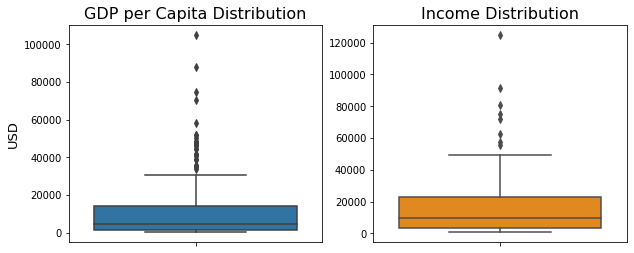

In [7]:
# Plotting distribution of GDP and Income

plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
sns.boxplot(countries['gdpp'],orient="v")
plt.title('GDP per Capita Distribution', fontdict={'fontsize': 16,'fontweight': 12,'color': 'black'})
plt.ylabel('USD',fontdict={'fontsize': 13,'fontweight': 12,'color': 'black'})

plt.subplot(1,2,2)
sns.boxplot(countries['income'], orient="v",color='darkorange')
plt.title('Income Distribution', fontdict={'fontsize': 16,'fontweight': 12,'color': 'black'})
plt.ylabel(' ',fontdict={'fontsize': 13,'fontweight': 12,'color': 'black'})

plt.show()

- The countries of interest are the ones with low income and GDP per capita which are not evident from this plot. However we can see few outliers on the higher thresholds. These are the most developed and economically stable counntries, which definitely doesn't require any aid.

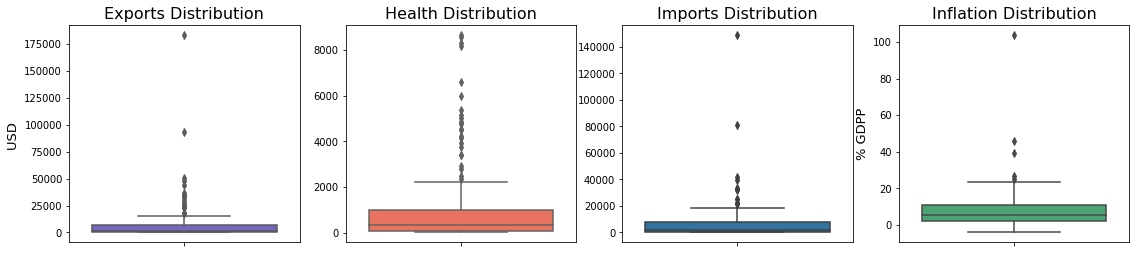

In [8]:
# Plotting distribution of inflation exports, imports and health spending

plt.figure(figsize=(19,4))
sns.color_palette()
plt.subplot(1,4,1)
sns.boxplot(countries['exports'],orient="v",color='slateblue')
plt.title('Exports Distribution', fontdict={'fontsize': 16,'fontweight': 12,'color': 'black'})
plt.ylabel('USD ',fontdict={'fontsize': 13,'fontweight': 12,'color': 'black'})

plt.subplot(1,4,2)
sns.boxplot(countries['health'], orient="v",color='tomato')
plt.title('Health Distribution', fontdict={'fontsize': 16,'fontweight': 12,'color': 'black'})
plt.ylabel(' ',fontdict={'fontsize': 13,'fontweight': 12,'color': 'black'})

plt.subplot(1,4,3)
sns.boxplot(countries['imports'],orient="v")
plt.title('Imports Distribution', fontdict={'fontsize': 16,'fontweight': 12,'color': 'black'})
plt.ylabel(' ',fontdict={'fontsize': 13,'fontweight': 12,'color': 'black'})

plt.subplot(1,4,4)
sns.boxplot(countries['inflation'], orient="v",color='mediumseagreen')
plt.title('Inflation Distribution', fontdict={'fontsize': 16,'fontweight': 12,'color': 'black'})
plt.ylabel('% GDPP',fontdict={'fontsize': 13,'fontweight': 12,'color': 'black'})


plt.show()

- The imports should be low and those with high exports are not economically very stable and these countries are of interest for us
- However, countries with high health, exports and inflation are very stable counrties and may not require an aid.

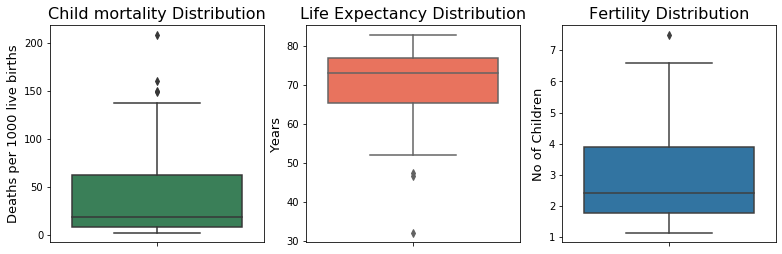

In [9]:
plt.figure(figsize=(13,4))
sns.color_palette()
plt.subplot(1,3,1)
sns.boxplot(countries['child_mort'],orient="v",color='seagreen')
plt.title('Child mortality Distribution', fontdict={'fontsize': 16,'fontweight': 12,'color': 'black'})
plt.ylabel('Deaths per 1000 live births',fontdict={'fontsize': 13,'fontweight': 12,'color': 'black'})

plt.subplot(1,3,2)
sns.boxplot(countries['life_expec'], orient="v",color='tomato')
plt.title('Life Expectancy Distribution', fontdict={'fontsize': 16,'fontweight': 12,'color': 'black'})
plt.ylabel('Years',fontdict={'fontsize': 13,'fontweight': 12,'color': 'black'})

plt.subplot(1,3,3)
sns.boxplot(countries['total_fer'],orient="v")
plt.title('Fertility Distribution', fontdict={'fontsize': 16,'fontweight': 12,'color': 'black'})
plt.ylabel('No of Children',fontdict={'fontsize': 13,'fontweight': 12,'color': 'black'})
plt.show()

#### Countries in the need of aid will have:
- High Child mortality
- Lower Life expectancy
- High Child Fertility

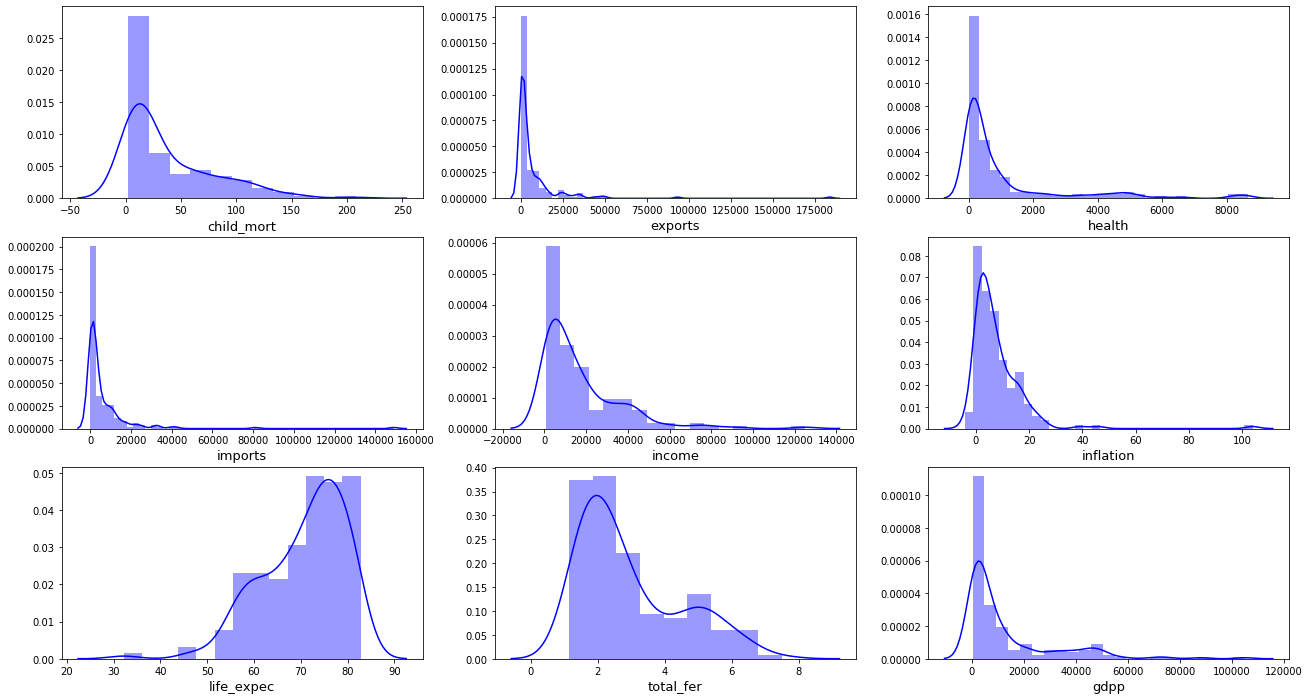

In [10]:
plt.figure(figsize = (22,12))
feature = countries.columns[1:]
plt.title('Attribute Distribution', fontdict={'fontsize': 16,'fontweight': 12,'color': 'black'})
for i in enumerate(feature):
    plt.subplot(3,3, i[0]+1)
    sns.distplot(countries[i[1]],color='blue')
    plt.xlabel(i[1],fontdict={'fontsize': 13,'fontweight': 12,'color': 'black'})

#### The following Attributes can help in cluster profiling 
- total fertility 
- GDPP
- child_mort
- income

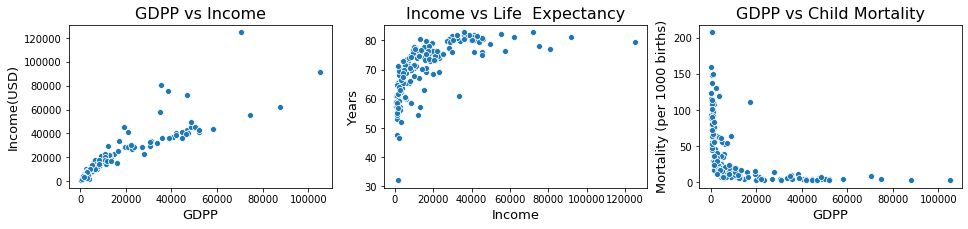

In [11]:
plt.figure(figsize=(16,3))

plt.subplot(1,3,1)
sns.scatterplot(x=countries['gdpp'],y=countries['income'])
plt.title('GDPP vs Income', fontdict={'fontsize': 16,'fontweight': 12,'color': 'black'})
plt.xlabel('GDPP',fontdict={'fontsize': 13,'fontweight': 12,'color': 'black'})
plt.ylabel('Income(USD)',fontdict={'fontsize': 13,'fontweight': 12,'color': 'black'})

plt.subplot(1,3,2)
sns.scatterplot(x=countries['income'],y=countries['life_expec'])
plt.title('Income vs Life  Expectancy', fontdict={'fontsize': 16,'fontweight': 12,'color': 'black'})
plt.xlabel('Income',fontdict={'fontsize': 13,'fontweight': 12,'color': 'black'})
plt.ylabel('Years',fontdict={'fontsize': 13,'fontweight': 12,'color': 'black'})


plt.subplot(1,3,3)
sns.scatterplot(x=countries['gdpp'],y=countries['child_mort'])
plt.title('GDPP vs Child Mortality', fontdict={'fontsize': 16,'fontweight': 12,'color': 'black'})
plt.xlabel('GDPP',fontdict={'fontsize': 13,'fontweight': 12,'color': 'black'})
plt.ylabel('Mortality (per 1000 births)',fontdict={'fontsize': 13,'fontweight': 12,'color': 'black'})

plt.show()

- GDPP is positively correlated with income
- As the income increases the life expectancy also  increases, however, it saturates after 30,000 USD
- When GDPP is higher the child mortality falls down significantly

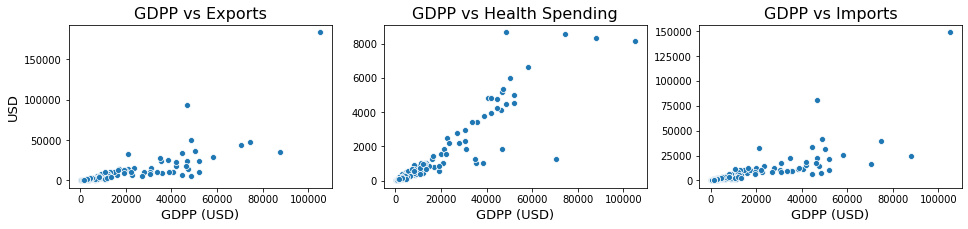

In [12]:
plt.figure(figsize=(16,3))

plt.subplot(1,3,1)
sns.scatterplot(x=countries['gdpp'],y=countries['exports'])
plt.title('GDPP vs Exports', fontdict={'fontsize': 16,'fontweight': 12,'color': 'black'})
plt.xlabel('GDPP (USD)',fontdict={'fontsize': 13,'fontweight': 12,'color': 'black'})
plt.ylabel('USD',fontdict={'fontsize': 13,'fontweight': 12,'color': 'black'})

plt.subplot(1,3,2)
sns.scatterplot(x=countries['gdpp'],y=countries['health'])
plt.title('GDPP vs Health Spending', fontdict={'fontsize': 16,'fontweight': 12,'color': 'black'})
plt.xlabel('GDPP (USD)',fontdict={'fontsize': 13,'fontweight': 12,'color': 'black'})
plt.ylabel(' ',fontdict={'fontsize': 13,'fontweight': 12,'color': 'black'})


plt.subplot(1,3,3)
sns.scatterplot(x=countries['gdpp'],y=countries['imports'])
plt.title('GDPP vs Imports', fontdict={'fontsize': 16,'fontweight': 12,'color': 'black'})
plt.xlabel('GDPP (USD)',fontdict={'fontsize': 13,'fontweight': 12,'color': 'black'})
plt.ylabel(' ',fontdict={'fontsize': 13,'fontweight': 12,'color': 'black'})

plt.show()

- There is no direct conclusion that can be taken from the plots

### Outlier Analysis

#### From boxplots, it is evident that almost all attributes have outliers
- To have better clustering it is necessary to remove outlier. However since the dataset is small we cannot remove many outliers as it will effect our analysis
- Hence we will cap extreme outliers using soft range and we can define our IQR as (99 percentile - 1 percentile) rather than conventional 75-25 quantile

In [13]:
import warnings
warnings.filterwarnings('ignore')

#### Capping atributes

In [14]:
for i in feature:
    # Finding outlier for GDP per capita
    Q1 = countries[i].quantile(0.01)
    Q3 = countries[i].quantile(0.99)
    # capping values
    countries[i][countries[i]<= Q1] = Q1
    countries[i][countries[i]>= Q3] = Q3

In [15]:
countries.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0


## Clustering


#### Hopkins Test for cluster tendency

In [16]:
# Check the hopkins

#Calculating the Hopkins statistic
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [17]:
countries.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0


In [18]:
countriesorg=countries.copy()

In [19]:
countriesorg.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0


In [20]:
hopkins(countries.drop('country',axis = 1))

0.8964678560723444

### Data Preprocessing/ transformation

In [21]:
countries=countries.iloc[:,1:]
scaler = StandardScaler()

# fit_transform
countries_scaled= scaler.fit_transform(countries)
countries_scaled.shape

(167, 9)

In [22]:
countries_scaled=pd.DataFrame(countries_scaled)
countries_scaled.head()

,0,1,2,3,4,5,6,7,8
0,1.344012,-0.569638,-0.566983,-0.598844,-0.851772,0.263649,-1.693799,1.926928,-0.702314
1,-0.547543,-0.473873,-0.440417,-0.413679,-0.387025,-0.375251,0.663053,-0.865911,-0.498775
2,-0.272548,-0.424015,-0.486295,-0.476198,-0.221124,1.123260,0.686504,-0.035427,-0.477483
3,2.084186,-0.381264,-0.534113,-0.464070,-0.612136,1.936405,-1.236499,2.154642,-0.531000
4,-0.709457,-0.086754,-0.178431,0.139659,0.125202,-0.768917,0.721681,-0.544433,-0.032079


## K-Means

### Finding numbers of clusters

#### SSD

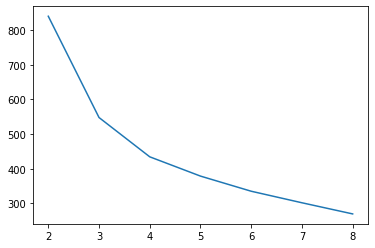

In [23]:
ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(countries_scaled)
    
    ssd.append(kmeans.inertia_)
    
# plot the SSDs for each n_clusters
# ssd
plt.plot(range_n_clusters,ssd)

#### Silhouette Analysis


In [24]:
# silhouette analysis
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(countries_scaled)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(countries_scaled, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))
    
    

For n_clusters=2, the silhouette score is 0.46939980287788113
For n_clusters=3, the silhouette score is 0.40708993455880516
For n_clusters=4, the silhouette score is 0.39539142309551445
For n_clusters=5, the silhouette score is 0.3864288935632213
For n_clusters=6, the silhouette score is 0.3043409418631626
For n_clusters=7, the silhouette score is 0.30902861266121956
For n_clusters=8, the silhouette score is 0.3228730973139938


- From the SSD and silhouette score we observe that 3 clusters is a descent choice

## Final Model

In [25]:
# final model with k=3
kmeans = KMeans(n_clusters=3, max_iter=100, random_state = 50)
kmeans.fit(countries_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=50, tol=0.0001, verbose=0)

In [26]:
cl=list(kmeans.labels_)
d={}
for i in range(3):
    count=0
    for j in cl:
        if i==j:
            count=count+1
    d[i]=count
d
    

{0: 90, 1: 29, 2: 48}

- We see all the clusters have descent count of countries

In [27]:
# assign the label
countriesorg['Label'] = kmeans.labels_
countriesorg.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Label
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0,2
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0,0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0,0
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0,2
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0,0


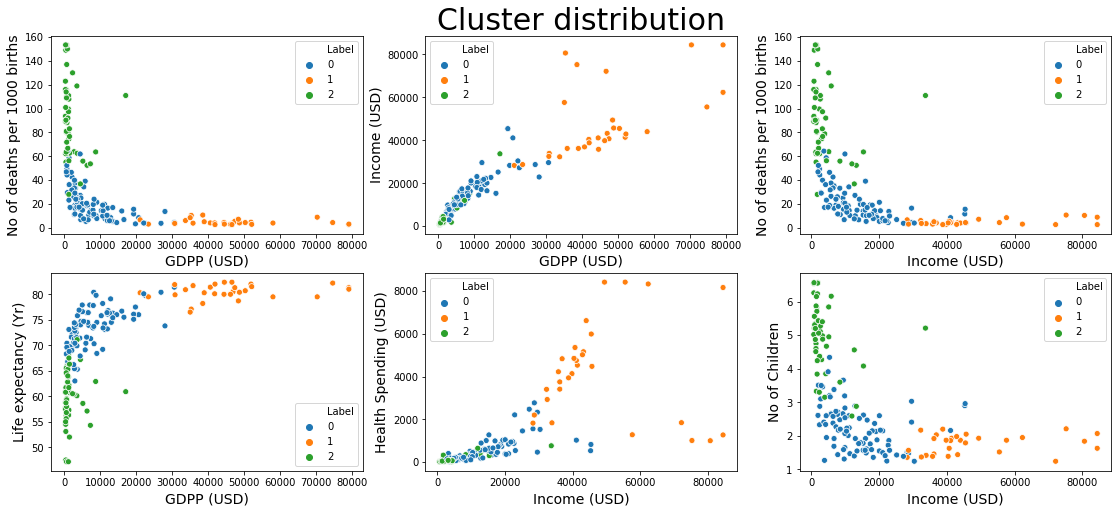

In [28]:
# Plot the cluster
plt.figure(figsize=(19,8))
plt.subplot(2,3,1)
sns.scatterplot(x = 'gdpp', y = 'child_mort', hue = 'Label', data = countriesorg, palette = 'tab10')
plt.xlabel('GDPP (USD)',fontdict={'fontsize': 14,'fontweight': 12,'color': 'black'})
plt.ylabel('No of deaths per 1000 births',fontdict={'fontsize': 14,'fontweight': 12,'color': 'black'})

plt.subplot(2,3,2)
sns.scatterplot(x = 'gdpp', y = 'income', hue = 'Label', data = countriesorg, palette = 'tab10')
plt.title('Cluster distribution', fontdict={'fontsize': 30,'fontweight': 14,'color': 'black'})
plt.xlabel('GDPP (USD)',fontdict={'fontsize': 14,'fontweight': 12,'color': 'black'})
plt.ylabel('Income (USD)',fontdict={'fontsize': 14,'fontweight': 12,'color': 'black'})

plt.subplot(2,3,3)
sns.scatterplot(x = 'income', y = 'child_mort', hue = 'Label', data = countriesorg, palette = 'tab10')
plt.xlabel('Income (USD)',fontdict={'fontsize': 14,'fontweight': 12,'color': 'black'})
plt.ylabel('No of deaths per 1000 births',fontdict={'fontsize': 14,'fontweight': 12,'color': 'black'})

plt.subplot(2,3,4)
sns.scatterplot(x = 'gdpp', y = 'life_expec', hue = 'Label', data = countriesorg, palette = 'tab10')
plt.xlabel('GDPP (USD)',fontdict={'fontsize': 14,'fontweight': 12,'color': 'black'})
plt.ylabel('Life expectancy (Yr)',fontdict={'fontsize': 14,'fontweight': 12,'color': 'black'})

plt.subplot(2,3,5)
sns.scatterplot(x = 'income', y = 'health', hue = 'Label', data = countriesorg, palette = 'tab10')
plt.xlabel('Income (USD)',fontdict={'fontsize': 14,'fontweight': 12,'color': 'black'})
plt.ylabel('Health Spending (USD)',fontdict={'fontsize': 14,'fontweight': 12,'color': 'black'})

plt.subplot(2,3,6)
sns.scatterplot(x = 'income', y = 'total_fer', hue = 'Label', data = countriesorg, palette = 'tab10')
plt.xlabel('Income (USD)',fontdict={'fontsize': 14,'fontweight': 12,'color': 'black'})
plt.ylabel('No of Children',fontdict={'fontsize': 14,'fontweight': 12,'color': 'black'})

plt.show()

- From plots we observe that the countries belonging to cluster 2 are of interest

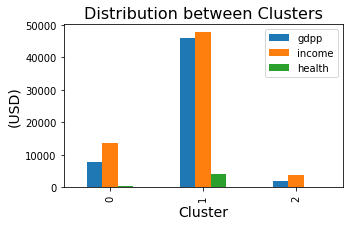

In [29]:
countriesorg[['gdpp', 'income', 'health']].groupby(countriesorg['Label']).mean().plot(kind = 'bar',figsize=(5,3))
plt.title('Distribution between Clusters', fontdict={'fontsize': 16,'fontweight': 14,'color': 'black'})
plt.xlabel('Cluster',fontdict={'fontsize': 14,'fontweight': 12,'color': 'black'})
plt.ylabel('(USD)',fontdict={'fontsize': 14,'fontweight': 12,'color': 'black'})
plt.show()

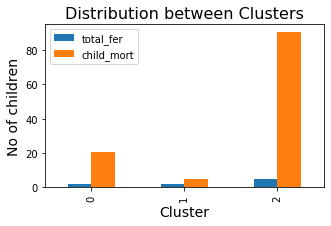

In [30]:
countriesorg[['total_fer', 'child_mort']].groupby(countriesorg['Label']).mean().plot(kind = 'bar', figsize=(5,3))
plt.title('Distribution between Clusters', fontdict={'fontsize': 16,'fontweight': 14,'color': 'black'})
plt.xlabel('Cluster',fontdict={'fontsize': 14,'fontweight': 12,'color': 'black'})
plt.ylabel('No of children',fontdict={'fontsize': 14,'fontweight': 12,'color': 'black'})
plt.show()

- making seperate dataframe for cluster of interest

In [31]:
clust_kmean=countriesorg[countriesorg['Label']==2]
c=clust_kmean[['country']]
c.reset_index(inplace=True)
clust_kmean.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Label
0,Afghanistan,90.2,55.300,41.9174,248.297,1610.0,9.440,56.2,5.82,553.0,2
3,Angola,119.0,2199.190,100.6050,1514.370,5900.0,22.400,60.1,6.16,3530.0,2
17,Benin,111.0,180.404,31.0780,281.976,1820.0,0.885,61.8,5.36,758.0,2
21,Botswana,52.5,2768.600,527.0500,3257.550,13300.0,8.920,57.1,2.88,6350.0,2
25,Burkina Faso,116.0,110.400,38.7550,170.200,1430.0,6.810,57.9,5.87,575.0,2


- To find countries with worst GDPP, Income and other factors we need to arrange these countries based on gdpp, income and child_mort
- So we will remove the label from the dataframe as they are of no use now and then standardize the values. Also before standardization we need to drop country and then again we will merge to  the data frame once scaling is over
- After standarisation we will take the mean of income, gdpp and child_mort values and then arrange the country based on this value. These attributes reflects the countries socio-economic stability and hence they have been chosen

In [32]:
# Standardizing Data frame
clust_kmean.drop(columns=['Label','country'],axis=1, inplace=True)
clust_kmean.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,55.300,41.9174,248.297,1610.0,9.440,56.2,5.82,553.0
3,119.0,2199.190,100.6050,1514.370,5900.0,22.400,60.1,6.16,3530.0
17,111.0,180.404,31.0780,281.976,1820.0,0.885,61.8,5.36,758.0
21,52.5,2768.600,527.0500,3257.550,13300.0,8.920,57.1,2.88,6350.0
25,116.0,110.400,38.7550,170.200,1430.0,6.810,57.9,5.87,575.0


In [33]:
# Merging country name to the scaled data frame
clust_kmean_scaled=pd.DataFrame(scaler.fit_transform(clust_kmean),columns=clust_kmean.columns)
clust_kmean_scaled=pd.concat([c,clust_kmean_scaled],axis=1)
clust_kmean_scaled.drop(columns=['index'],axis=1,inplace=True)
clust_kmean_scaled.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,-0.004438,-0.369603,-0.446032,-0.379766,-0.414324,-0.138755,-0.646033,0.860489,-0.469379
1,Angola,0.939388,0.592269,-0.087555,0.450607,0.361513,1.400063,0.102249,1.205592,0.559287
2,Benin,0.677214,-0.313474,-0.512242,-0.357678,-0.376346,-1.154541,0.428424,0.393586,-0.398543
3,Botswana,-1.239933,0.847738,2.517265,1.593899,1.699788,-0.200498,-0.473353,-2.123632,1.533703
4,Burkina Faso,0.841073,-0.344882,-0.465349,-0.430988,-0.446877,-0.451031,-0.319859,0.911240,-0.461777


In [51]:
# Finding mean of income, gdpp and child_mort for each country and then taking mean as parameter to sort and find worst affected country
clust_kmean_scaled['Mean']=clust_kmean_scaled[['income','gdpp','child_mort']].mean(axis=1)
clust_kmean_scaled=clust_kmean_scaled.sort_values(by=['Mean'])
clust_kmean_scaled.head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Mean
40,Solomon Islands,-1.813380,-0.139275,-0.091031,0.116169,-0.428234,-0.493657,0.298700,-0.590984,-0.265630,-0.835748
14,Eritrea,-0.987259,-0.414925,-0.615653,-0.502239,-0.491180,-0.019579,0.298700,-0.246926,-0.512915,-0.663785
27,Madagascar,-0.773870,-0.378871,-0.615653,-0.459068,-0.496425,-0.297691,0.139024,-0.256225,-0.534032,-0.601443
37,Rwanda,-0.731193,-0.394923,-0.378859,-0.464814,-0.503419,-0.909341,0.813210,-0.339915,-0.488125,-0.574246
22,Kenya,-0.773870,-0.335281,-0.452995,-0.361647,-0.305840,-0.960807,0.493859,-0.470099,-0.364483,-0.481398
23,Kiribati,-0.758628,-0.336180,0.235573,0.210751,-0.436976,-1.017221,0.121282,-0.962940,-0.204421,-0.466675
38,Senegal,-0.633643,-0.313319,-0.393002,-0.310010,-0.358295,-0.984560,0.706759,0.171523,-0.354384,-0.448774
43,Tanzania,-0.478174,-0.366267,-0.474041,-0.441417,-0.374031,-0.252164,-0.127102,0.515582,-0.445585,-0.432597
48,Yemen,-0.953727,-0.248553,-0.329689,-0.278507,0.043857,1.168091,1.327720,-0.191133,-0.259510,-0.389793
16,Gambia,-0.222107,-0.365151,-0.531474,-0.417815,-0.449216,-0.742078,0.972885,0.775950,-0.488431,-0.386585


### Conclusion (K-Means)
- We see that countries under cluster two are the ones in dire need of any aid
- We observe that countries of cluster 2 has less GDP per capita, Income and Health Spending as compared with countries from other clusters
- Also the child mortality and number of fertility are comparatively much higher in cluster 2 countries

#### The list of 5 countries who need the aid from HELP NGO are:
- Solomon Islands
- Eritrea
- Madagascar
- Rwanda
- Kenya

## Hierarchical clustering

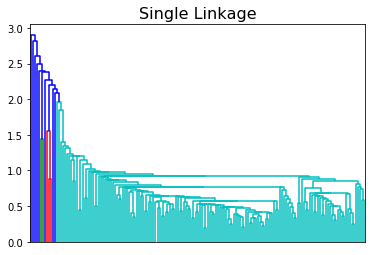

In [35]:
# single linkage
mergings = linkage(countries_scaled, method="single", metric='euclidean')
dendrogram(mergings)
plt.title('Single Linkage', fontdict={'fontsize': 16,'fontweight': 14,'color': 'black'})
plt.xticks(ticks=[])
plt.show()

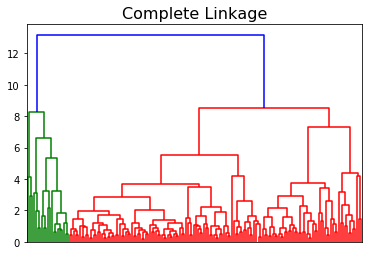

In [36]:
# complete linkage
mergings = linkage(countries_scaled, method="complete", metric='euclidean')
dendrogram(mergings)
plt.title('Complete Linkage', fontdict={'fontsize': 16,'fontweight': 14,'color': 'black'})
plt.xticks(ticks=[])
plt.show()

- We will move futher with Complete Linkage Method due to better results as compared with single linkage

In [37]:
# We will chose 3 clusters
cluster_labels = cut_tree(mergings, n_clusters=3).reshape(-1, )
cluster_labels

array([0, 1, 1, 0, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 0, 1, 1, 1, 0,
       1, 2, 1, 0, 0, 1, 0, 2, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       2, 1, 1, 1, 1, 0, 0, 1, 1, 2, 2, 0, 0, 1, 2, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 2, 1, 1, 1, 0, 2, 1, 1, 1, 1, 1, 1, 0, 0, 2, 1, 0, 1, 1, 0,
       0, 1, 1, 2, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       2, 1, 0, 0, 2, 1, 0, 1, 1, 1, 1, 1, 1, 2, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 2, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 2, 2, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 2, 1, 2, 1, 1, 1, 0, 1, 0, 0])

In [38]:
countriesorg['label']=cluster_labels
countriesorg.label.value_counts()

1    96
0    50
2    21
Name: label, dtype: int64

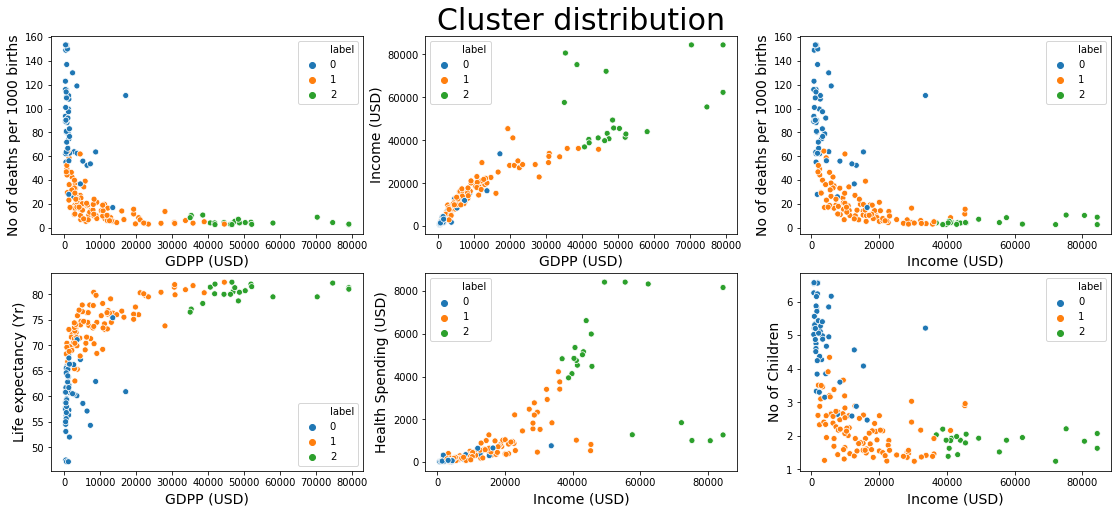

In [39]:
# Plot the cluster
plt.figure(figsize=(19,8))
plt.subplot(2,3,1)
sns.scatterplot(x = 'gdpp', y = 'child_mort', hue = 'label', data = countriesorg, palette = 'tab10')
plt.xlabel('GDPP (USD)',fontdict={'fontsize': 14,'fontweight': 12,'color': 'black'})
plt.ylabel('No of deaths per 1000 births',fontdict={'fontsize': 14,'fontweight': 12,'color': 'black'})

plt.subplot(2,3,2)
sns.scatterplot(x = 'gdpp', y = 'income', hue = 'label', data = countriesorg, palette = 'tab10')
plt.title('Cluster distribution', fontdict={'fontsize': 30,'fontweight': 14,'color': 'black'})
plt.xlabel('GDPP (USD)',fontdict={'fontsize': 14,'fontweight': 12,'color': 'black'})
plt.ylabel('Income (USD)',fontdict={'fontsize': 14,'fontweight': 12,'color': 'black'})

plt.subplot(2,3,3)
sns.scatterplot(x = 'income', y = 'child_mort', hue = 'label', data = countriesorg, palette = 'tab10')
plt.xlabel('Income (USD)',fontdict={'fontsize': 14,'fontweight': 12,'color': 'black'})
plt.ylabel('No of deaths per 1000 births',fontdict={'fontsize': 14,'fontweight': 12,'color': 'black'})

plt.subplot(2,3,4)
sns.scatterplot(x = 'gdpp', y = 'life_expec', hue = 'label', data = countriesorg, palette = 'tab10')
plt.xlabel('GDPP (USD)',fontdict={'fontsize': 14,'fontweight': 12,'color': 'black'})
plt.ylabel('Life expectancy (Yr)',fontdict={'fontsize': 14,'fontweight': 12,'color': 'black'})

plt.subplot(2,3,5)
sns.scatterplot(x = 'income', y = 'health', hue = 'label', data = countriesorg, palette = 'tab10')
plt.xlabel('Income (USD)',fontdict={'fontsize': 14,'fontweight': 12,'color': 'black'})
plt.ylabel('Health Spending (USD)',fontdict={'fontsize': 14,'fontweight': 12,'color': 'black'})

plt.subplot(2,3,6)
sns.scatterplot(x = 'income', y = 'total_fer', hue = 'label', data = countriesorg, palette = 'tab10')
plt.xlabel('Income (USD)',fontdict={'fontsize': 14,'fontweight': 12,'color': 'black'})
plt.ylabel('No of Children',fontdict={'fontsize': 14,'fontweight': 12,'color': 'black'})

plt.show()

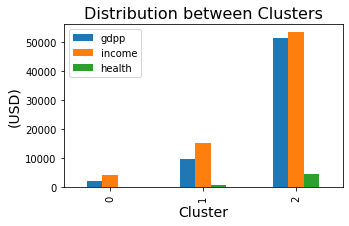

In [40]:
countriesorg[['gdpp', 'income', 'health']].groupby(countriesorg['label']).mean().plot(kind = 'bar',figsize=(5,3))
plt.title('Distribution between Clusters', fontdict={'fontsize': 16,'fontweight': 14,'color': 'black'})
plt.xlabel('Cluster',fontdict={'fontsize': 14,'fontweight': 12,'color': 'black'})
plt.ylabel('(USD)',fontdict={'fontsize': 14,'fontweight': 12,'color': 'black'})
plt.show()

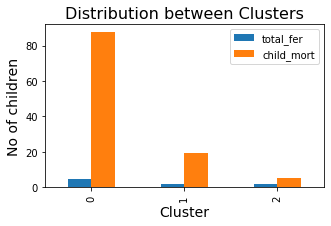

In [41]:
countriesorg[['total_fer', 'child_mort']].groupby(countriesorg['label']).mean().plot(kind = 'bar', figsize=(5,3))
plt.title('Distribution between Clusters', fontdict={'fontsize': 16,'fontweight': 14,'color': 'black'})
plt.xlabel('Cluster',fontdict={'fontsize': 14,'fontweight': 12,'color': 'black'})
plt.ylabel('No of children',fontdict={'fontsize': 14,'fontweight': 12,'color': 'black'})
plt.show()

- To find countries with worst GDPP, Income and other factors we need to arrange these countries based on gdpp, income and child_mort
- So we will remove the label from the dataframe as they are of no use now and then standardize the values. Also before standardization we need to drop country and then again we will merge to  the data frame once scaling is over
- After standarisation we will take the mean of income, gdpp and child_mort values and then arrange the country based on this value. These attributes reflects the countries socio-economic stability and hence they have been chosen

In [42]:
clust_kmean=countriesorg[countriesorg['label']==0]
c=clust_kmean[['country']]
c.reset_index(inplace=True)
clust_kmean.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Label,label
0,Afghanistan,90.2,55.300,41.9174,248.297,1610.0,9.440,56.2,5.82,553.0,2,0
3,Angola,119.0,2199.190,100.6050,1514.370,5900.0,22.400,60.1,6.16,3530.0,2,0
17,Benin,111.0,180.404,31.0780,281.976,1820.0,0.885,61.8,5.36,758.0,2,0
21,Botswana,52.5,2768.600,527.0500,3257.550,13300.0,8.920,57.1,2.88,6350.0,2,0
25,Burkina Faso,116.0,110.400,38.7550,170.200,1430.0,6.810,57.9,5.87,575.0,2,0


In [43]:
# Standardizing Data frame
clust_kmean.drop(columns=['Label','label','country'],axis=1, inplace=True)
clust_kmean.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,55.300,41.9174,248.297,1610.0,9.440,56.2,5.82,553.0
3,119.0,2199.190,100.6050,1514.370,5900.0,22.400,60.1,6.16,3530.0
17,111.0,180.404,31.0780,281.976,1820.0,0.885,61.8,5.36,758.0
21,52.5,2768.600,527.0500,3257.550,13300.0,8.920,57.1,2.88,6350.0
25,116.0,110.400,38.7550,170.200,1430.0,6.810,57.9,5.87,575.0


In [44]:
# Merging country name to the scaled data frame
clust_kmean_scaled=pd.DataFrame(scaler.fit_transform(clust_kmean),columns=clust_kmean.columns)
clust_kmean_scaled=pd.concat([c,clust_kmean_scaled],axis=1)
clust_kmean_scaled.drop(columns=['index'],axis=1,inplace=True)
clust_kmean_scaled.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,0.079686,-0.400437,-0.475575,-0.412311,-0.457958,-0.233359,-0.677095,0.878238,-0.491186
1,Angola,0.957629,0.563799,-0.145526,0.424912,0.292142,1.049324,0.014832,1.194400,0.419911
2,Benin,0.713756,-0.344170,-0.536534,-0.390040,-0.421240,-1.080069,0.316441,0.450490,-0.428447
3,Botswana,-1.069567,0.819898,2.252728,1.577634,1.586023,-0.284825,-0.517420,-1.855632,1.282959
4,Burkina Faso,0.866176,-0.375655,-0.493360,-0.463955,-0.489431,-0.493657,-0.375486,0.924732,-0.484453


In [50]:
# Finding mean of income, gdpp and child_mort for each country and then taking mean as parameter to sort and find worst affected country
clust_kmean_scaled['Mean']=clust_kmean_scaled[['income','gdpp','child_mort']].mean(axis=1)
clust_kmean_scaled=clust_kmean_scaled.sort_values(by=['Mean'])
clust_kmean_scaled.head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Mean
40,Solomon Islands,-1.813380,-0.139275,-0.091031,0.116169,-0.428234,-0.493657,0.298700,-0.590984,-0.265630,-0.835748
14,Eritrea,-0.987259,-0.414925,-0.615653,-0.502239,-0.491180,-0.019579,0.298700,-0.246926,-0.512915,-0.663785
27,Madagascar,-0.773870,-0.378871,-0.615653,-0.459068,-0.496425,-0.297691,0.139024,-0.256225,-0.534032,-0.601443
37,Rwanda,-0.731193,-0.394923,-0.378859,-0.464814,-0.503419,-0.909341,0.813210,-0.339915,-0.488125,-0.574246
22,Kenya,-0.773870,-0.335281,-0.452995,-0.361647,-0.305840,-0.960807,0.493859,-0.470099,-0.364483,-0.481398
23,Kiribati,-0.758628,-0.336180,0.235573,0.210751,-0.436976,-1.017221,0.121282,-0.962940,-0.204421,-0.466675
38,Senegal,-0.633643,-0.313319,-0.393002,-0.310010,-0.358295,-0.984560,0.706759,0.171523,-0.354384,-0.448774
43,Tanzania,-0.478174,-0.366267,-0.474041,-0.441417,-0.374031,-0.252164,-0.127102,0.515582,-0.445585,-0.432597
48,Yemen,-0.953727,-0.248553,-0.329689,-0.278507,0.043857,1.168091,1.327720,-0.191133,-0.259510,-0.389793
16,Gambia,-0.222107,-0.365151,-0.531474,-0.417815,-0.449216,-0.742078,0.972885,0.775950,-0.488431,-0.386585


### Conclusion (Hierarchical)
- We see that countries under cluster 0 are the ones in dire need of any aid
- We observe that countries of cluster 0 has less GDP per capita, Income and Health Spending as compared with countries from other clusters
- Also the child mortality and number of fertility are comparatively much higher in cluster 0 countries

#### The list of 5 countries who need the aid from HELP NGO are:
- Solomon Islands
- Eritrea
- Madagascar
- Rwanda
- Kenya

### The results from Hierarchical and K-Means clustering are same for this problem